# Salted water in a tank
A tank contains 1000 L of pure water. Starting at t=0, a 0.1 kg/L salt-solution streams into the tank at a rate of 6 L/min.

Using numeric methods, plot the change in the concentration of salt over time.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
class Tank(object):
    def __init__(self, volume=1000, tank_conc=0, in_rate=6, sol_conc = 0.1, out_rate=6):
        self.volume = volume
        self.tank_conc = tank_conc
        self.in_rate = in_rate
        self.sol_conc = sol_conc
        self.out_rate = out_rate

        self.t = [0]
        self.h = [tank_conc]
        self.v = []

    def step(self, i):
        
        salt_weight = self.tank_conc * self.volume
        self.volume += self.in_rate
        self.tank_conc = (salt_weight + (self.in_rate * self.sol_conc)) / self.volume
        self.volume += -self.out_rate
    

    def run(self, time):
        assert time > 0
        for i in range(1, time):    
            self.step(i)
            self.t.append(i)
            self.h.append(self.tank_conc)
        
    def run_euler(self, time):
        t = np.arange(0, time)
        h = np.zeros(time)
        v = np.zeros(time)

        h[0] = self.tank_conc
        v[0] = self.volume
        for i in range(time-1):
            v[i+1] = v[i] + self.in_rate - self.out_rate
            h[i+1] = ((h[i] * (v[i])) + (self.in_rate * self.sol_conc)) / (v[i+1] + self.out_rate)

        self.t = t 
        self.h = h
        self.v = v
        



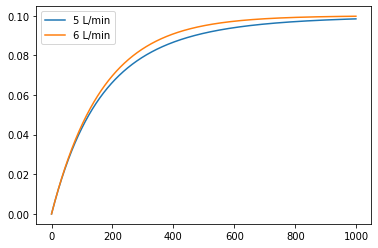

In [3]:
tank = Tank()
tank.run(1000)
t = tank.t
h = tank.h

tank2 = Tank(out_rate=5)
tank2.run(1000)
t2 = tank2.t
h2 = tank2.h
plt.plot(t2, h2, label="5 L/min")
plt.plot(t, h, label="6 L/min")
plt.legend()
plt.show()

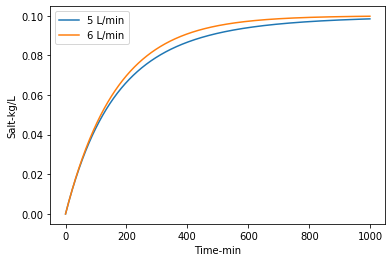

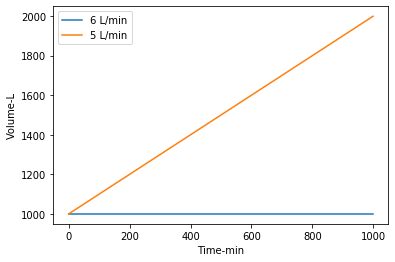

In [4]:
tank = Tank()
tank.run_euler(1000)
t = tank.t
h = tank.h

tank2 = Tank(out_rate=5)
tank2.run_euler(1000)
t2 = tank2.t
h2 = tank2.h
plt.plot(t2, h2, label="5 L/min")
plt.plot(t, h, label="6 L/min")
plt.xlabel("Time-min")
plt.ylabel("Salt-kg/L")
plt.legend()
plt.show()

v = tank.v
v2 = tank2.v
plt.plot(t, v, label="6 L/min")
plt.plot(t2, v2, label="5 L/min")
plt.xlabel("Time-min")
plt.ylabel("Volume-L")
plt.legend()
plt.show()